In [2]:
import stompy.model.delft.dflow_model as dfm
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [3]:
# data_2d_2019_hybrid: Appears not to have the dwaq tracers. Bug in hybrid_model. Fixed.

model=dfm.DFlowModel.load("data_2d_2019_hybrid-v001")

/home/rustyh/src/stompy/stompy/grid/unstructured_grid.py:1133: RuntimeWarning: invalid value encountered in cast
  cells=cells.astype(np.int32)


In [4]:
map_ds=model.map_dataset()

/home/rustyh/src/stompy/stompy/grid/unstructured_grid.py:872: RuntimeWarning: invalid value encountered in cast
  ug.edges['cells'] = nc[mesh.attrs['edge_face_connectivity']].values
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned n

In [5]:
from stompy.plot import nbviz

<IPython.core.display.Javascript object>


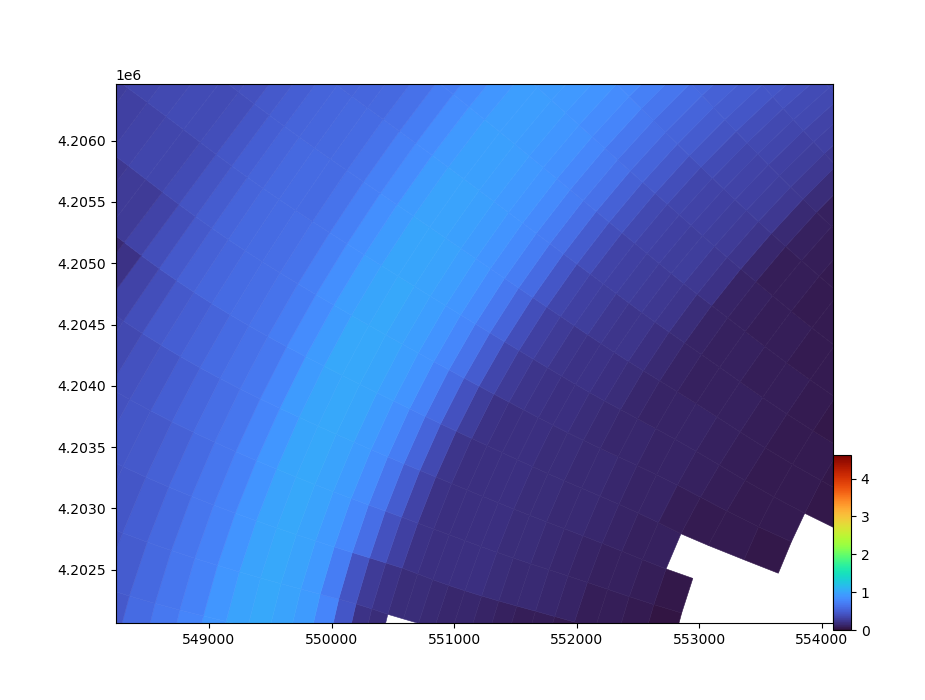

Checking for edge vars
edge dimension: mesh2d_nEdges


NBViz(children=(VBox(children=(Label(value='Coordinates'),), layout=Layout(grid_area='header')), Select(descri…

Will update/create coordinate pane


In [6]:
nbviz.NBViz(datasets=[map_ds])

In [8]:
map_ds.dims

Frozen({'mesh2d_nNodes': 10362, 'mesh2d_nEdges': 19189, 'Two': 2, 'mesh2d_nFaces': 8828, 'mesh2d_nMax_face_nodes': 4, 'time': 721})

<IPython.core.display.Javascript object>


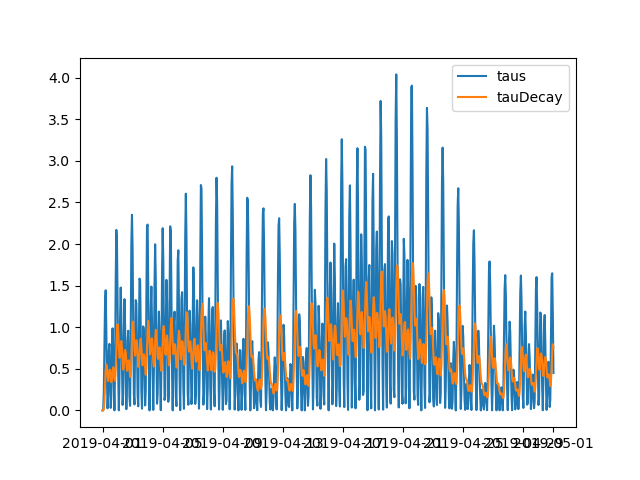

In [12]:
# Check tau time series vs tauDecay timeseries
# select some reasonable point with decent bed stress.
#xy=[624290, 4241584]
xy=[550450,4204570]
c=map_ds.grid.select_cells_nearest(xy)

fig,ax=plt.subplots()
taus=map_ds['mesh2d_taus'].isel(mesh2d_nFaces=c)
tauDecay=map_ds['mesh2d_tauDecay'].isel(mesh2d_nFaces=c)

ax.plot(taus.time, taus,label='taus')
ax.plot(tauDecay.time, tauDecay,label='tauDecay')
ax.legend()